In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,random_split
from torchvision import datasets, transforms
from torchvision import utils
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter

In [28]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

In [29]:
train_data = datasets.ImageFolder("simpson_train",transform=transform)

In [30]:
for i,data in enumerate(train_data):
    image,label=data
    print(image.shape,label.shape)
    if i ==3:
        break

AttributeError: 'int' object has no attribute 'shape'

In [31]:
split = 0.2
val=int(len(train_data)*split)
train = int(len(train_data)*(1-split))+1
train, valid = random_split(train_data,[train,val])
print(len(train),len(valid))

8999 2249


In [32]:
print(len(train_data))

11248


In [39]:
writer = SummaryWriter()
train_loader = DataLoader(train,batch_size=64,num_workers=2)
valid_loader = DataLoader(valid,batch_size=64,num_workers=2) 

image, label = next(iter(train_loader))
grid = utils.make_grid(image)
writer.add_image('images', grid, 0)

In [40]:
def imshow(img):
    img = (img/2 + 0.5)
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))

In [41]:
for i,data in  enumerate(train_loader):
  img,labels = data
  print(img.shape,labels.shape)
  break

torch.Size([64, 3, 224, 224]) torch.Size([64])


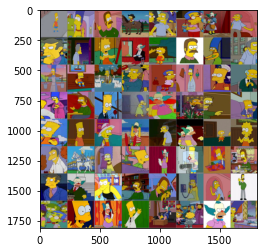

In [42]:
imshow(grid)

In [43]:
densenet= models.densenet169(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


  0%|          | 0.00/54.7M [00:00<?, ?B/s]

In [44]:
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [45]:
densenet.classifier = nn.Linear(1664,10)

In [46]:
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
densenet.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=densenet.parameters(), lr=0.0001)

In [51]:
epochs = 25

for epoch in range(epochs):  
    running_loss = 0
    train_loss = 0

    for i, data in enumerate(train_loader):
        # Batch에 해당하는 Data 추출
        x, y_true = data #x는 input data에 해당 y_true는 label에 해당
        x = x.to(device) 
        y_true = y_true.to(device) 

        optimizer.zero_grad()
        
        # 입력에 대한 결과 예측
        y_pred = densenet(x)

        # 예측값과 정답을 비교하여 손실함수의 값 계산
        loss = criterion(y_pred, y_true)
        writer.add_scalar("Loss/train", loss, epoch)
        # 손실함수의 값이 작아지는 방향으로 네트워크 업데이트
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        running_loss += loss.item() #로깅용 running_loss
    train_loss /= len(train_loader)
    correct = 0
    total = 0
    val_loss = 0
    densenet.eval()
    with torch.no_grad():
        for i, data in enumerate(valid_loader):
        #for i, (images,labels) in enumerate(valid_loader):
            images,labels=data
            images = images.to(device)
            labels = labels.to(device)
            outputs = densenet(images)
            loss = criterion(outputs,labels)
            writer.add_scalar("Loss/valid", loss, epoch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_acc = 100 * correct / total
            writer.add_scalar("Acc/valid", val_acc, epoch)

    val_loss = val_loss / len(valid_loader)
    print('Epoch {}, Train Loss: {}, Val Loss: {}, Val Acc: {}'.format(epoch, train_loss, val_loss, val_acc ))

writer.close()

Epoch 0, Train Loss: 0.37593406720205824, Val Loss: 0.07287413580343127, Val Acc: 98.04357492218764
Epoch 1, Train Loss: 0.11789679381474588, Val Loss: 0.054590867961653404, Val Acc: 98.26589595375722
Epoch 2, Train Loss: 0.034423127488312825, Val Loss: 0.10084105334115318, Val Acc: 97.55446865273454
Epoch 3, Train Loss: 0.025819687206157342, Val Loss: 0.05740558326942846, Val Acc: 98.2214317474433
Epoch 4, Train Loss: 0.021748777717853076, Val Loss: 0.0879808331454923, Val Acc: 97.6878612716763
Epoch 5, Train Loss: 0.020014714694910944, Val Loss: 0.06921830726464072, Val Acc: 98.17696754112939
Epoch 6, Train Loss: 0.013639422246239086, Val Loss: 0.06034416764103096, Val Acc: 98.39928857269898
Epoch 7, Train Loss: 0.023083374922862276, Val Loss: 0.06544305868414489, Val Acc: 97.86571809693197
Epoch 8, Train Loss: 0.020344318968113034, Val Loss: 0.05820014950101419, Val Acc: 98.4437527790129
Epoch 9, Train Loss: 0.006059282684499206, Val Loss: 0.050357252243581264, Val Acc: 98.755002223

In [53]:
test_data = datasets.ImageFolder("simpson_test",transform=transform)
test_loader = DataLoader(test_data, batch_size=64)


In [60]:
def evaluation():
  densenet.eval()
  correct = 0
  total = 0
  with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            outputs = densenet(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
            
  return test_acc

In [61]:
print(evaluation())

8.655616942909761


In [64]:
%load_ext tensorboard
%tensorboard --logdir=runs